In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("./data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

<AxesSubplot:>

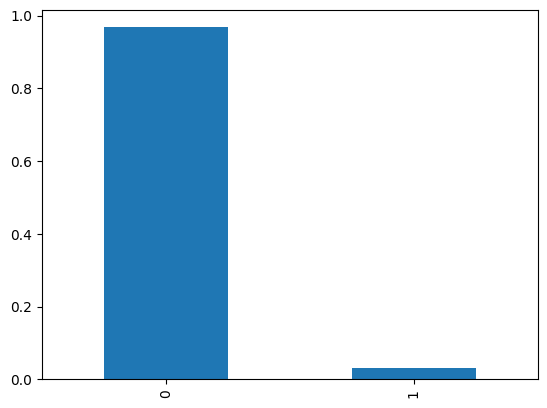

In [4]:
df["Bankrupt?"].value_counts(normalize=True).plot(kind='bar')

In [5]:
df["Bankruptdesc"] = df["Bankrupt?"].map({
    0 : "Not Bankrupt",
    1 : "Bankrupt"
})

<AxesSubplot:>

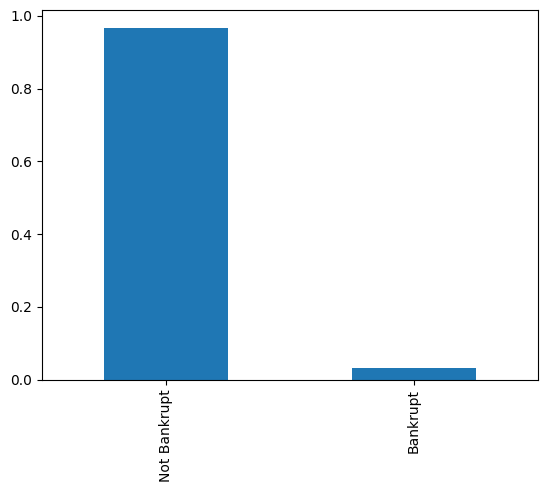

In [6]:
df["Bankruptdesc"].value_counts(normalize=True).plot(kind='bar')

### Oversampling

In [7]:
from sklearn.utils import resample

# Example: Over-sampling the minority class
minority_class = df[df['Bankrupt?'] == 1]
majority_class = df[df['Bankrupt?'] == 0]

minority_class_upsampled = resample(minority_class, replace=True, n_samples=len(majority_class), random_state=42)

balanced_df = pd.concat([majority_class, minority_class_upsampled])


In [8]:
from imblearn.over_sampling import RandomOverSampler

In [9]:
over_smapler = RandomOverSampler()

In [10]:
y = df.iloc[:,0]
X = df.iloc[:,1:]

In [11]:
X_imb_res, y_imb_res = over_smapler.fit_resample(X, y)

In [12]:
X_imb_res.drop('Bankruptdesc', axis=1, inplace=True)

In [13]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X_imb_res, y_imb_res, test_size=0.25)
X_train, X_test, y_train, y_test = X_train.values, X_test.values, y_train.values, y_test.values
# Standardise the whole dataset
std_scaler = StandardScaler().fit(X_train)

def preprocessor(X):
    D = np.copy(X)
    D = std_scaler.transform(D)
    return D

In [14]:
preprocess_transformer = FunctionTransformer(preprocessor)
preprocess_transformer

FunctionTransformer(func=<function preprocessor at 0x0000027695A16438>)

In [15]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

p1 = Pipeline([('scaler', preprocess_transformer),
              ('Logistic Regression', LogisticRegression())])
p1

Pipeline(steps=[('scaler',
                 FunctionTransformer(func=<function preprocessor at 0x0000027695A16438>)),
                ('Logistic Regression', LogisticRegression())])

In [16]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, accuracy_score

def fit_and_print(p, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test):
    # Fit the transformer
    p.fit(X_train, y_train)
    # Predict the train and test outputs
    test_prediction =p.predict(X_test)
    
    # Print the errors
    print("Accuracy Score:   "+str(accuracy_score(test_prediction, y_test)*100))
    print("Precision Score:  "+str(precision_score(test_prediction, y_test)*100))
    print("Recall Score:     "+str(recall_score(test_prediction, y_test)*100))
    print("roc_auc_score:    "+str(accuracy_score(test_prediction, y_test)*100))
    print("\nConfusion Matrix:\n", confusion_matrix(test_prediction, y_test))

In [17]:
fit_and_print(p1)

Accuracy Score:   87.2121212121212
Precision Score:  87.40390301596689
Recall Score:     87.61114404267931
roc_auc_score:    87.2121212121212

Confusion Matrix:
 [[1400  213]
 [ 209 1478]]


C:\Users\HP\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [18]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

p1 = Pipeline([('scaler', preprocess_transformer),
              ('Logistic Regression', LogisticRegression())])
p1

Pipeline(steps=[('scaler',
                 FunctionTransformer(func=<function preprocessor at 0x0000027695A16438>)),
                ('Logistic Regression', LogisticRegression())])

In [19]:
balanced_df.drop("Bankruptdesc", axis=1, inplace=True)

In [20]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separate features from target
X = balanced_df.iloc[:,1:]
y = balanced_df.iloc[:,0]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
X_train, X_test, y_train, y_test = X_train.values, X_test.values, y_train.values, y_test.values
# Standardise the whole dataset
std_scaler = StandardScaler().fit(X_train)

def preprocessor(X):
    D = np.copy(X)
    D = std_scaler.transform(D)
    return D

### Fitting a Logistic Regression Classifier

In [21]:
p2 = Pipeline([('scaler', preprocess_transformer),
              ('Logistic Regression', LogisticRegression())])
p2

Pipeline(steps=[('scaler',
                 FunctionTransformer(func=<function preprocessor at 0x0000027695A16438>)),
                ('Logistic Regression', LogisticRegression())])

In [22]:
balanced_df

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
6,0,0.390923,0.445704,0.436158,0.619950,0.619950,0.998993,0.797012,0.808960,0.302814,...,0.736619,0.018372,0.623655,0.619949,0.829980,0.292504,0.026622,0.564200,1,0.015663
7,0,0.508361,0.570922,0.559077,0.601738,0.601717,0.999009,0.797449,0.809362,0.303545,...,0.815350,0.010005,0.623843,0.601739,0.841459,0.278607,0.027031,0.566089,1,0.034889
8,0,0.488519,0.545137,0.543284,0.603612,0.603612,0.998961,0.797414,0.809338,0.303584,...,0.803647,0.000824,0.623977,0.603613,0.840487,0.276423,0.026891,0.565592,1,0.065826
9,0,0.495686,0.550916,0.542963,0.599209,0.599209,0.999001,0.797404,0.809320,0.303483,...,0.804195,0.005798,0.623865,0.599205,0.840688,0.279388,0.027243,0.566668,1,0.030801
10,0,0.482475,0.567543,0.538198,0.614026,0.614026,0.998978,0.797535,0.809460,0.303759,...,0.814111,0.076972,0.623687,0.614021,0.841337,0.278356,0.026971,0.565892,1,0.036572
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3595,1,0.102325,0.121511,0.112212,0.585876,0.585876,0.998786,0.796917,0.808863,0.303082,...,0.481836,0.000692,0.623637,0.585875,0.798728,0.287020,0.026771,0.565059,1,0.018077
5,1,0.388680,0.415177,0.419134,0.590171,0.590251,0.998758,0.796903,0.808771,0.303116,...,0.710420,0.005278,0.622605,0.590172,0.829939,0.285087,0.026675,0.564538,1,0.019534
2908,1,0.446497,0.495475,0.493763,0.606473,0.606423,0.998907,0.797282,0.809207,0.303468,...,0.768935,0.000564,0.623540,0.606475,0.836306,0.287988,0.026529,0.563500,1,0.017506
2001,1,0.438795,0.090166,0.464586,0.540776,0.540776,0.997789,0.790787,0.802967,0.294457,...,0.411809,0.011098,0.625487,0.540775,0.996912,0.209222,0.026779,0.565098,1,0.008753


In [23]:
fit_and_print(p2)

Accuracy Score:   87.57575757575758
Precision Score:  87.87699586043762
Recall Score:     87.87699586043762
roc_auc_score:    87.57575757575758

Confusion Matrix:
 [[1404  205]
 [ 205 1486]]


C:\Users\HP\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [24]:
X_test.shape

(3300, 95)

### Fitting a Random Forest Classifier

In [25]:
from sklearn.ensemble import RandomForestClassifier
p22 = Pipeline([('scaler', preprocess_transformer),
              ('RFC', RandomForestClassifier())])
fit_and_print(p22)

Accuracy Score:   99.51515151515152
Precision Score:  100.0
Recall Score:     99.06268306971295
roc_auc_score:    99.51515151515152

Confusion Matrix:
 [[1593    0]
 [  16 1691]]


In [26]:
from sklearn.ensemble import RandomForestClassifier
p2 = Pipeline([('scaler', preprocess_transformer),
              ('RFC', RandomForestClassifier(max_depth=4, n_estimators=30))])
fit_and_print(p2)

Accuracy Score:   90.24242424242425
Precision Score:  91.1886457717327
Recall Score:     89.91253644314868
roc_auc_score:    90.24242424242425

Confusion Matrix:
 [[1436  149]
 [ 173 1542]]


In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

# Assuming X and y are your input features and target variable
# Make sure to replace X and y with your actual data
X = X  # Assuming your features are in the DataFrame df
y = y   # Assuming your target variable is in the last column of the DataFrame df

# Create the RandomForestClassifier and StandardScaler objects
rnd_clf = RandomForestClassifier()
sc = StandardScaler()

# Scale the input features
X = sc.fit_transform(X)

# Train the RandomForestClassifier
rnd_clf.fit(X, y)

# Print feature importances in descending order
importances = rnd_clf.feature_importances_
feature_names = df.iloc[:, :-1].columns.to_list()

# Sort in descending order
sorted_indices = sorted(range(len(importances)), key=lambda k: importances[k], reverse=True)

for index in sorted_indices:
    print(f"{feature_names[index]}: {importances[index]}")

 Non-industry income and expenditure/revenue: 0.05581583133371924
 Net Value Per Share (C): 0.05127552474984275
 Total debt/Total net worth: 0.04510590011508451
 Long-term fund suitability ratio (A): 0.040205099670874656
 Operating profit/Paid-in capital: 0.0384035785531207
 Retained Earnings to Total Assets: 0.03804893278667903
 Long-term Liability to Current Assets: 0.037189874259123276
 Debt ratio %: 0.02814477129176818
 Net Income Flag: 0.027159162804339124
 Operating Profit Per Share (Yuan ¥): 0.026960313747819837
 Gross Profit to Sales: 0.026863400995622202
 Liability to Equity: 0.02632049467460024
 After-tax net Interest Rate: 0.02592208994755924
 Liability-Assets Flag: 0.02592101077174149
 Quick Ratio: 0.023257273906572683
 Degree of Financial Leverage (DFL): 0.022292443344409607
Bankrupt?: 0.022214192498964204
 Net Income to Stockholder's Equity: 0.02134846021818064
 Pre-tax net Interest Rate: 0.018894298248464496
 Working Capital/Equity: 0.015643743106852622
 Net Value Per Sh

### Fit a Voting Classifier

In [28]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
svm_clf = SVC(kernel='linear', random_state=0)
dec_clf = DecisionTreeClassifier()

voting_clf = VotingClassifier(
estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf), ('dec', dec_clf)],
voting='hard')

In [29]:
p3 = Pipeline([('scaler', preprocess_transformer),
              ('VCL', voting_clf)])
fit_and_print(p3)

C:\Users\HP\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Accuracy Score:   93.54545454545455
Precision Score:  90.00591366055588
Recall Score:     97.19029374201787
roc_auc_score:    93.54545454545455

Confusion Matrix:
 [[1565  169]
 [  44 1522]]


### Bagging and Pasting

In [30]:
from sklearn.ensemble import BaggingClassifier
bag_clf = BaggingClassifier(
SVC(kernel='linear', random_state=0), n_estimators=500,
max_samples=100, bootstrap=True, n_jobs=-1, oob_score=True)

In [31]:
p4 = Pipeline([('scaler', preprocess_transformer),
              ('VCL', bag_clf)])
fit_and_print(p4)

Accuracy Score:   87.24242424242425
Precision Score:  88.5866351271437
Recall Score:     86.79026651216685
roc_auc_score:    87.24242424242425

Confusion Matrix:
 [[1381  193]
 [ 228 1498]]


### Boosting with ADABoost and Decision Trees

In [32]:
from sklearn.ensemble import AdaBoostClassifier
ada_clf = AdaBoostClassifier(
DecisionTreeClassifier(max_depth=1), n_estimators=200,
algorithm="SAMME.R", learning_rate=0.5)

In [33]:
p5 = Pipeline([('scaler', preprocess_transformer),
              ('AdaCL', ada_clf)])
fit_and_print(p5)

Accuracy Score:   95.45454545454545
Precision Score:  97.22057953873447
Recall Score:     94.10417859187177
roc_auc_score:    95.45454545454545

Confusion Matrix:
 [[1506   47]
 [ 103 1644]]


### Gradient Boosting

In [34]:
from sklearn.ensemble import GradientBoostingClassifier
p6 = Pipeline([('scaler', preprocess_transformer),
              ('GBC', GradientBoostingClassifier())])
fit_and_print(p6)

Accuracy Score:   95.87878787878788
Precision Score:  98.93554109994086
Recall Score:     93.41150195421552
roc_auc_score:    95.87878787878788

Confusion Matrix:
 [[1491   18]
 [ 118 1673]]


### XGBoost Classifier

In [35]:
from xgboost import XGBClassifier

p7 = Pipeline([('scaler', preprocess_transformer),
              ('XGBC', XGBClassifier())])
fit_and_print(p7)

Accuracy Score:   99.33333333333333
Precision Score:  100.0
Recall Score:     98.71570344424985
roc_auc_score:    99.33333333333333

Confusion Matrix:
 [[1587    0]
 [  22 1691]]


### Conclusion

In [36]:
# Standardize the features
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
# Fit the XGBoost model
rnd_clf = RandomForestClassifier()
rnd_clf.fit(X_train, y_train)
y_pred = rnd_clf.predict(X_test)

y_pred_proba = rnd_clf.predict_proba(X_test)

In [37]:
# Create a DataFrame for y_test and y_pred
data_dict = {"Actual": y_test, "Prediction": y_pred}
results_df = pd.DataFrame(data_dict)

In [38]:
results_df

,Actual,Prediction
0,0,0
1,1,1
2,0,0
3,1,1
4,0,0
...,...,...
3295,1,1
3296,1,1
3297,0,0
3298,1,1


### Confusion Matrix

Confusion Matrix:

- A confusion matrix provides a tabular summary of the performance of a classification algorithm.
- It compares the predicted values against the actual values, breaking them down into true positives, true negatives, false positives, and false negatives.
- You can use libraries like scikit-learn to compute and visualize the confusion matrix.

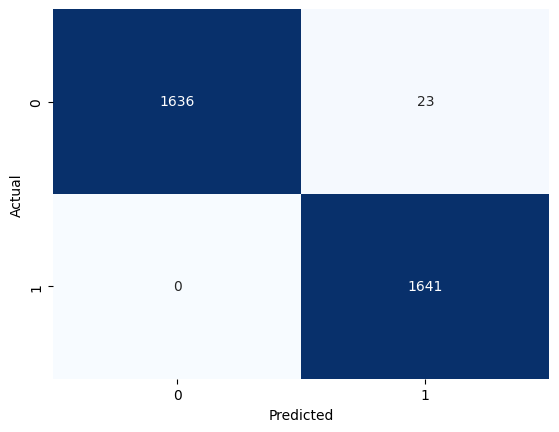

In [39]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


### Receiver Operating Characteristic (ROC) Curve

- The ROC curve is a graphical representation of the trade-off between true positive rate (sensitivity) and false positive rate (1- specificity).
- It is useful for assessing the performance of a classification model at various threshold settings.
- Scikit-learn provides functions to compute and plot ROC curves.

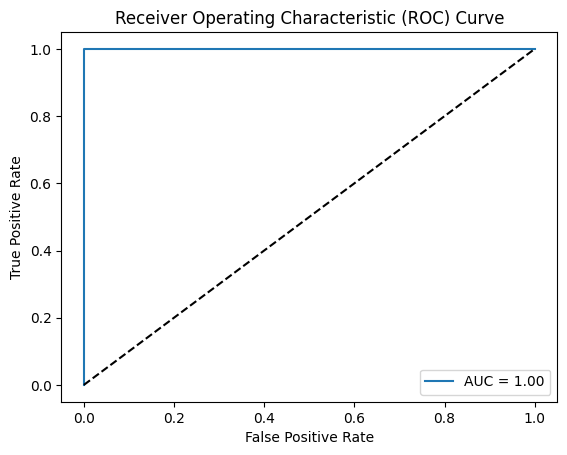

In [40]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


### Precision-Recall Curve:

- The precision-recall curve is another way to assess the performance of a binary classification model, particularly when dealing with imbalanced datasets.
- It plots precision against recall for different thresholds.
- Scikit-learn provides functions to compute and plot precision-recall curves.

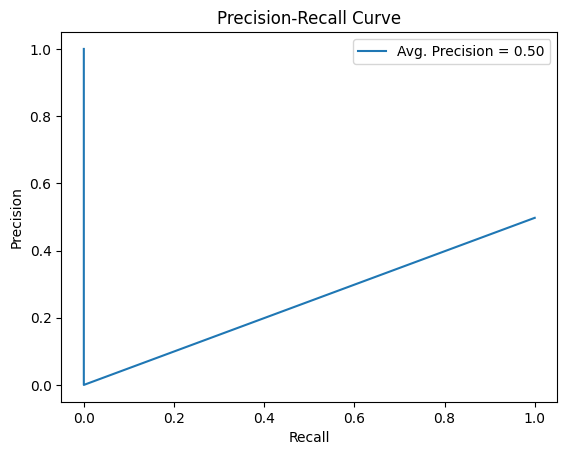

In [46]:
from sklearn.metrics import precision_recall_curve, average_precision_score

precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba[:,0])
avg_precision = average_precision_score(y_test, y_pred_proba[:,0])

plt.plot(recall, precision, label=f'Avg. Precision = {avg_precision:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='upper right')
plt.show()


In the context of detecting rare cases of burglary in a supermarket, it's generally more important to have a high recall than precision. Here's why:

1. **Recall (Sensitivity or True Positive Rate):** Recall measures the ability of a model to capture all the relevant instances of the positive class (burglary in this case) among all actual positive instances. High recall means the model is good at identifying most of the actual cases of burglary.

   - **Importance:** In the context of detecting rare events like burglary, missing a true positive (failure to detect an actual case) can have severe consequences. Therefore, having high recall helps in minimizing false negatives, which are instances where the model fails to identify an actual case of burglary.

2. **Precision (Positive Predictive Value):** Precision measures the accuracy of the model when it predicts the positive class. It is the ratio of true positives to the total number of predicted positives. High precision means that when the model predicts a positive case, it is likely to be correct.

   - **Importance:** While precision is important, it may be acceptable to have some false positives (incorrectly predicting burglary) as long as the recall is high. False positives might lead to inconvenience or additional investigation but are generally less critical than missing actual cases (false negatives) in the context of detecting rare events.

In summary, for the specific scenario of detecting rare cases of burglary in a supermarket, prioritize high recall to ensure that the model identifies as many actual cases as possible, even if it means accepting a certain level of false positives.

Precision becomes important in the context of the supermarket example when the cost or consequences associated with false positives (incorrectly predicting burglary) is high. Here are some scenarios where precision becomes more crucial:

1. **Resource Allocation:** If the supermarket security or management has limited resources for investigating or responding to potential burglary incidents, high precision is essential. High precision ensures that when the model predicts a burglary, it is more likely to be a true positive, reducing the wasted resources spent on false alarms.

2. **Customer Experience:** False alarms or unnecessary security interventions can inconvenience customers and impact their shopping experience. If precision is high, the likelihood of causing unnecessary disruptions to regular customers is reduced, leading to a better overall customer experience.

3. **Legal Implications:** False accusations of burglary can have legal consequences. High precision is crucial to minimize the risk of accusing innocent individuals or taking actions based on false positives that may lead to legal issues.

4. **Cost of Investigation:** Investigating potential burglary incidents, even if they turn out to be false alarms, incurs costs. High precision reduces the number of false positives, lowering the overall cost of unnecessary investigations and interventions.

In summary, precision is particularly important in situations where the cost, inconvenience, or potential negative consequences associated with false positives are high. Balancing precision and recall is often a trade-off, and the choice depends on the specific priorities and constraints of the supermarket's security objectives and operational considerations.